## Name - Nanak Shrestha

In [32]:
# PACKAGE: DO NOT EDIT THIS CELL
import numpy as np
import timeit

In [33]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from ipywidgets import interact
from load_data import load_mnist
MNIST = load_mnist()
images, labels = MNIST['data'], MNIST['target']

In [34]:
print(images.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB
None


In [35]:
print(images.describe())

        pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.000774      0.000390      0.000183   
std        0.0      0.0  ...      0.023495      

In [36]:
print(images.shape)  


(70000, 784)


In [37]:
print(labels.shape)  

(70000,)


In [38]:
get_ipython().run_line_magic('matplotlib', 'inline')


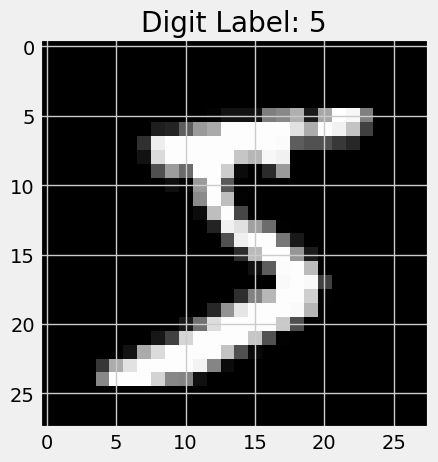

In [39]:
# plt.figure(figsize=(4,4))

# plt.imshow(images[0].reshape(28,28), cmap='gray');

image = images.iloc[0].values.reshape(28, 28)


plt.imshow(image, cmap='gray')
plt.title(f"Digit Label: {labels[0]}")
plt.show() 

In [40]:
# Before we implement PCA, we will need to do some data preprocessing. In this assessment, some of them
# will be implemented by you, others we will take care of. However, when you are working on real world problems, you will need to do all these steps by yourself!
#
# The preprocessing steps we will do are
# 1. Convert unsigned interger 8 (uint8) encoding of pixels to a floating point number between 0-1.
# 2. Subtract from each image the mean $\boldsymbol \mu$.
# 3. Scale each dimension of each image by $\frac{1}{\sigma}$ where $\sigma$ is the stardard deviation.
#
# The steps above ensure that our images will have zero mean and one variance. These preprocessing
# steps are also known as [Data Normalization or Feature Scaling](https://en.wikipedia.org/wiki/Feature_scaling).

# ## 1. PCA
#
# Now we will implement PCA. Before we do that, let's pause for a moment and
# think about the steps for performing PCA. Assume that we are performing PCA on
# some dataset $\boldsymbol X$ for $M$ principal components.
# We then need to perform the following steps, which we break into parts:
#
# 1. Data normalization (`normalize`).
# 2. Find eigenvalues and corresponding eigenvectors for the covariance matrix $S$.
#    Sort by the largest eigenvalues and the corresponding eigenvectors (`eig`).
#
# After these steps, we can then compute the projection and reconstruction of the data onto the spaced spanned by the top $n$ eigenvectors.

# PCA Implementation and Data Preprocessing

This document outlines the steps for data preprocessing and implementing Principal Component Analysis (PCA) on image data.

## Data Preprocessing

Before applying PCA, it's crucial to preprocess the data to ensure that it is in the correct form. The following steps will be applied to the image data:

1. **Convert Pixel Values**:  
   The image pixels are encoded as unsigned integers (uint8), which range from 0 to 255. We will convert these values to floating point numbers between 0 and 1.

2. **Center the Data (Subtract the Mean)**:  
   We will subtract the mean value of each image, which ensures that the data is centered around zero. This helps PCA focus on the variations in the data rather than absolute values.

3. **Standardize the Data (Scale by Standard Deviation)**:  
   Each dimension (feature) of the data will be divided by its standard deviation, so that all features have a variance of 1. This is known as standardization.

These preprocessing steps are commonly referred to as **Data Normalization** or **Feature Scaling** and are necessary to ensure that the data is ready for PCA.

---

## PCA Steps

Once the data is preprocessed, we can proceed with implementing PCA. Below are the steps for performing PCA:

1. **Data Normalization**:  
   Apply the preprocessing steps mentioned above (convert pixel values, center the data, and standardize the data).

2. **Covariance Matrix Calculation**:  
   Compute the covariance matrix, which captures the relationships and variance between different features of the dataset.

3. **Eigenvalue and Eigenvector Calculation**:  
   Find the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors represent the principal components, which are the directions of maximum variance in the data, and the eigenvalues indicate the importance of each component.

4. **Select Principal Components**:  
   Sort the eigenvalues in descending order and select the top `M` eigenvectors (principal components) based on their corresponding eigenvalues.

---

## Projection and Reconstruction

Once the top `M` principal components are selected, you can:

- **Project the data** onto the new subspace spanned by these components, reducing the dimensionality.
- **Reconstruct the data** by reversing the projection, allowing you to approximate the original data with fewer dimensions.

These steps allow you to reduce the complexity of the dataset while retaining as much information as possible.


In [41]:
def normalize(X):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset

    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the
        mean and standard deviation respectively.

    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those
        dimensions when doing normalization.
    """
    mu = np.mean(X, axis=0)  # <-- EDIT THIS, compute the mean of X
    std = np.std(X, axis=0)
    std_filled = std.copy()
    std_filled[std==0] = 1.
    Xbar = (X - mu) / std_filled   # <-- EDIT THIS, compute the normalized data Xbar
    return Xbar, mu, std


**Normalization**: The function `normalize(X)` ensures that the dataset `X` has zero mean and unit variance for each feature. This step is crucial as it removes biases caused by varying scales of the features and allows PCA to better capture the relationships within the data.

In [42]:
def eig(S):
    """Compute the eigenvalues and corresponding eigenvectors
        for the covariance matrix S.
    Args:
        S: ndarray, covariance matrix

    Returns:
        (eigvals, eigvecs): ndarray, the eigenvalues and eigenvectors

    Note:
        The eigenvals and eigenvecs should be sorted in descending
        order of the eigen values
    """
    eigen_values, eigen_vectors = np.linalg.eig(S)
    idx = eigen_values.argsort()[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:,idx]
    return (eigen_values, eigen_vectors) # <-- EDIT THIS to return the eigenvalues and corresponding eigenvectors


In [43]:
def projection_matrix(B):
    """Compute the projection matrix onto the space spanned by `B`
    Args:
        B: ndarray of dimension (D, M), the basis for the subspace

    Returns:
        P: the projection matrix
    """
    # Compute the projection matrix P = B(B^T B)^(-1) B^T
    P = B @ np.linalg.inv(B.T @ B) @ B.T
    return P # <-- EDIT THIS to compute the projection matrix

### Projection Matrix Explanation

The **projection matrix** \( \mathbf{P} \) is used to project vectors onto the subspace spanned by the columns of matrix \( \mathbf{B} \), where \( \mathbf{B} \) contains the basis vectors of that subspace.

#### Matrix \( \mathbf{B} \):
- **\( \mathbf{B} \)** is a matrix of dimensions \( D \times M \), where:
  - \( D \) is the dimension of the vector space.
  - \( M \) is the number of basis vectors, where \( M \leq D \).

#### Projection Matrix Formula:
The projection matrix \( \mathbf{P} \) is calculated using the formula:

\[
\mathbf{P} = \mathbf{B} \left( \mathbf{B}^T \mathbf{B} \right)^{-1} \mathbf{B}^T
\]

Where:
- \( \mathbf{B} \) is the matrix of basis vectors.
- \( \mathbf{B}^T \) is the transpose of \( \mathbf{B} \).
- \( \left( \mathbf{B}^T \mathbf{B} \right)^{-1} \) is the inverse of the matrix product \( \mathbf{B}^T \mathbf{B} \).

#### Key Points:
- The projection matrix \( \mathbf{P} \) ensures that any vector projected onto this subspace will lie within the space spanned by the columns of \( \mathbf{B} \).
- This method is useful in various applications such as **Principal Component Analysis (PCA)** and **dimensionality reduction**, where we project data onto a lower-dimensional subspace.


In [44]:
def PCA(X, num_components):
    """
    Args:
        X: ndarray of size (N, D), where D is the dimension of the data,
           and N is the number of datapoints
        num_components: the number of principal components to use.
    Returns:
        X_reconstruct: ndarray of the reconstruction
        of X from the first `num_components` principal components.
    """
    X, mean, std = normalize(X)

    S = np.cov(X, rowvar=False, bias=True)

    eig_vals, eig_vecs = eig(S)

    P = projection_matrix(eig_vecs[:, :num_components])

    X_reduced = (P @ X.T).T

    print(f"X_reduced shape: {X_reduced.shape}")
    print(f"eig_vecs[:, :num_components].T shape: {eig_vecs[:, :num_components].T.shape}")

    X_reconstruct = (X_reduced @ P.T)

    X_reconstruct = X_reconstruct * std + mean
    
    # Return the reconstructed data
    return X_reconstruct


1. **Normalization**:  
   The function `normalize(X)` ensures that the dataset \( X \) has a mean of zero and a unit variance for each feature. This step prepares the data for PCA.

2. **Covariance Matrix Calculation**:  
   The covariance matrix of the data is computed using `np.cov(X, rowvar=False)`. This matrix captures the relationships between different features of the dataset.

3. **Eigen Decomposition**:  
   The function `eig(S)` is used to compute the eigenvalues and eigenvectors of the covariance matrix \( S \). These eigenvalues and eigenvectors help identify the principal components of the data.

4. **Projection Matrix Construction**:  
   The projection matrix is built using the top `num_components` eigenvectors. This is done with `projection_matrix(eig_vecs[:, :num_components])`, where the first `num_components` eigenvectors form the basis for the new lower-dimensional subspace.

5. **Data Reconstruction**:  
   The data is projected back into the original space using the selected eigenvectors. After projection, the data is de-normalized by reversing the normalization step to return to the original scale.

6. **Final Output**:  
   The reconstructed data, `X_reconstruct`, approximates the original dataset using only the selected principal components, reducing the dimensionality while preserving as much important information as possible.

This process returns an approximation of the original data using the specified number of principal components, enabling dimensionality reduction while retaining key features of the dataset.

In [45]:
NUM_DATAPOINTS = 1000

images_array = images.values 

# Check if images has enough data points
if images_array.shape[0] < NUM_DATAPOINTS:
    raise ValueError("Not enough data points in images")

# Preprocess the data
X = (images_array.reshape(-1, 28 * 28)[:NUM_DATAPOINTS]) / 255.
Xbar, mu, std = normalize(X)

In [46]:
from sklearn.decomposition import PCA as SKPCA

# Assume Xbar is already defined and normalized
for num_component in range(1, 20):
    # Scikit-learn PCA
    pca = SKPCA(n_components=num_component, svd_solver='full')
    sklearn_reconst = pca.inverse_transform(pca.fit_transform(Xbar))

    # Your custom PCA implementation
    reconst = PCA(Xbar, num_component)

    # Check if the two reconstructions are approximately equal
    try:
        np.testing.assert_almost_equal(reconst, sklearn_reconst)
    except AssertionError as e:
        print(f"Discrepancy found for {num_component} components: {e}")

    # Print the sum of squared differences
    print(f"Sum of squared differences for {num_component} components: {np.square(reconst - sklearn_reconst).sum()}")

X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (1, 784)
Sum of squared differences for 1 components: (7.283207374210715e-25+0j)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
Sum of squared differences for 2 components: (1.3442254926635448e-24+0j)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (3, 784)
Sum of squared differences for 3 components: (6.856944653907087e-25+0j)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (4, 784)
Sum of squared differences for 4 components: (2.3026500157830454e-24+0j)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (5, 784)
Sum of squared differences for 5 components: (9.173027145164524e-25+0j)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (6, 784)
Sum of squared differences for 6 components: (2.7214637964809042e-24+0j)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (7, 784)
Sum of squared differences for 7 

In [47]:
# The greater number of of principal components we use, the smaller will our reconstruction
# error be. Now, let's answer the following question:
#
#
# > How many principal components do we need
# > in order to reach a Mean Squared Error (MSE) of less than $100$ for our dataset?
#
#

# We have provided a function in the next cell which computes the mean squared error (MSE), which will be useful for answering the question above.

# Question

How many principal components are needed to reach a Mean Squared Error (MSE) of less than 100 for our dataset?

# Answer

To determine the number of principal components required to achieve an MSE of less than 100, we can follow these steps:

1. **Calculate the MSE**:  
   For each number of principal components, calculate the Mean Squared Error (MSE) between the reconstructed data and the original dataset.

2. **Iterate Through Components**:  
   Gradually increase the number of principal components, starting from 1, and calculate the MSE for each number of components.

3. **Check the Condition**:  
   Identify the smallest number of principal components where the MSE drops below 100. This number represents the minimum number of components needed to achieve the target MSE threshold.

By following this process, you can determine the optimal number of principal components required to reduce the reconstruction error to an acceptable level.


In [48]:
def mse(predict, actual):
    """Helper function for computing the mean squared error (MSE)"""
    return np.square(predict - actual).sum(axis=1).mean()

In [49]:
loss = []
reconstructions = []
# iterate over different number of principal components, and compute the MSE
for num_component in range(1, 100):
    reconst = PCA(Xbar, num_component)
    error = mse(reconst, Xbar)
    reconstructions.append(reconst)
    # print('n = {:d}, reconstruction_error = {:f}'.format(num_component, error))
    loss.append((num_component, error))

reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions * std + mu # "unnormalize" the reconstructed image
loss = np.asarray(loss)

X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (1, 784)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (3, 784)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (4, 784)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (5, 784)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (6, 784)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (7, 784)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (8, 784)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (9, 784)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (10, 784)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (11, 784)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (12, 784)
X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (13, 784)
X_reduce

In [50]:
import pandas as pd
# create a table showing the number of principal components and MSE
pd.DataFrame(loss).head()

,0,1
0,1.0+0.0j,569.447737+ 0.000000j
1,2.0+0.0j,536.059608+ 0.000000j
2,3.0+0.0j,508.250286+ 0.000000j
3,4.0+0.0j,487.018907+ 0.000000j
4,5.0+0.0j,467.571610+ 0.000000j


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


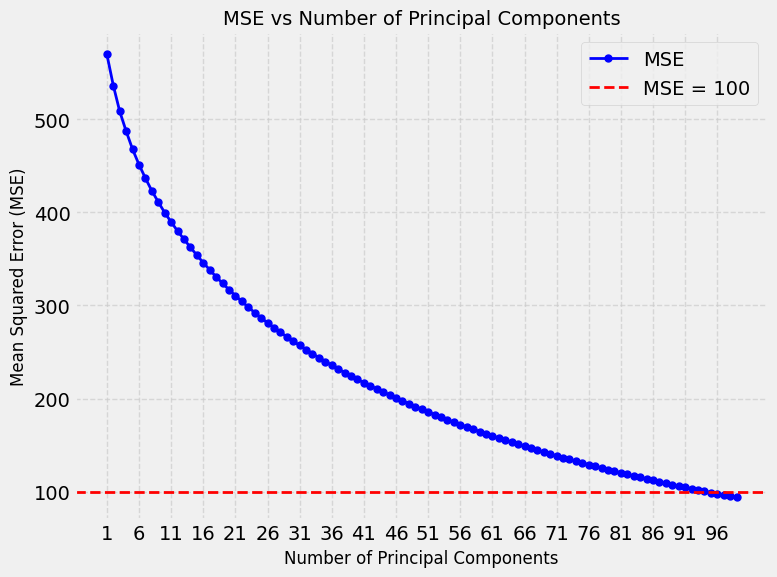

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(loss[:,0], loss[:,1], color='b', marker='o', linestyle='-', linewidth=2, markersize=5, label='MSE')


ax.axhline(100, linestyle='--', color='r', linewidth=2, label='MSE = 100')


ax.xaxis.set_ticks(np.arange(1, 100, 5))

ax.set_xlabel('Number of Principal Components', fontsize=12)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
ax.set_title('MSE vs Number of Principal Components', fontsize=14)

ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

plt.tight_layout()
plt.show()


In [52]:
#But _numbers dont't tell us everything_! Just what does it mean _qualitatively_ for the loss to decrease from around
# $450.0$ to less than $100.0$?
#
# Let's find out! In the next cell, we draw the the leftmost image is the original dight. Then we show the reconstruction of the image on the right, in descending number of principal components used.


In [54]:

@interact(image_idx=(0, len(reconstructions) - 1), recon_idx=(0, 999))
def show_num_components_reconst(image_idx, recon_idx):
    fig, ax = plt.subplots(figsize=(20., 20.))

    actual = X[image_idx].reshape(28, 28)

    reconstructed = np.real(reconstructions[image_idx][recon_idx].reshape(28, 28))

    x = np.concatenate([actual, reconstructed], axis=1) 

    ax.imshow(x, cmap='gray') 
    ax.axvline(28, color='orange', linewidth=2)
    ax.set_title(f'Original and Reconstructed (#{recon_idx}) at Index {image_idx}', fontsize=20)
    ax.axis('off')

    plt.show()



interactive(children=(IntSlider(value=49, description='image_idx', max=98), IntSlider(value=499, description='…

In [55]:
@interact(i=(0, 10))
def show_pca_digits(i=1):
    """Show the ith digit and its reconstruction"""
    plt.figure(figsize=(4, 4))

    actual_sample = X[i].reshape(28, 28)

    reconst_sample = np.real(reconst[i, :] * std + mu).reshape(28, 28)

    reconst_sample = (reconst_sample - reconst_sample.min()) / (reconst_sample.max() - reconst_sample.min())

    plt.imshow(np.hstack([actual_sample, reconst_sample]), cmap='gray')
    plt.title(f'Digit {i}: Actual vs Reconstructed', fontsize=16)
    plt.axis('off') 
    plt.show()

interactive(children=(IntSlider(value=1, description='i', max=10), Output()), _dom_classes=('widget-interact',…

X_reduced shape: (1000, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
CPU times: total: 62.5 ms
Wall time: 11.5 ms
CPU times: total: 109 ms
Wall time: 17.1 ms
X_reduced shape: (4, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
X_reduced shape: (4, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
X_reduced shape: (4, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
X_reduced shape: (4, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
X_reduced shape: (4, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
X_reduced shape: (4, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
X_reduced shape: (4, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
X_reduced shape: (4, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
X_reduced shape: (4, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
X_reduced shape: (4, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
X_reduced shape: (104, 784)
eig_vecs[:, :num_components].T shape: (2, 784)
X_reduced shape: (104, 784)
ei

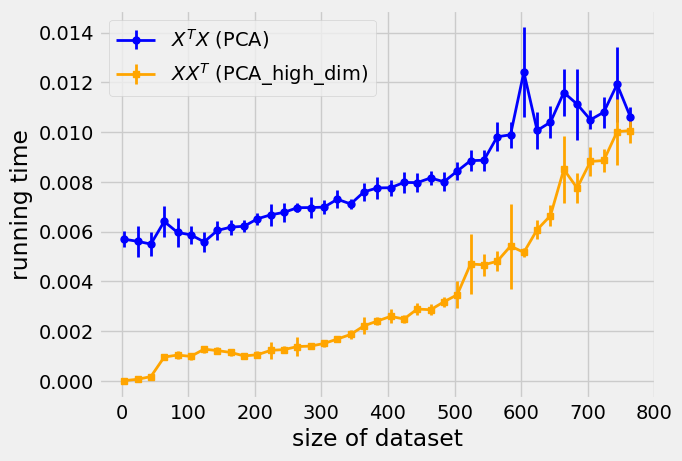

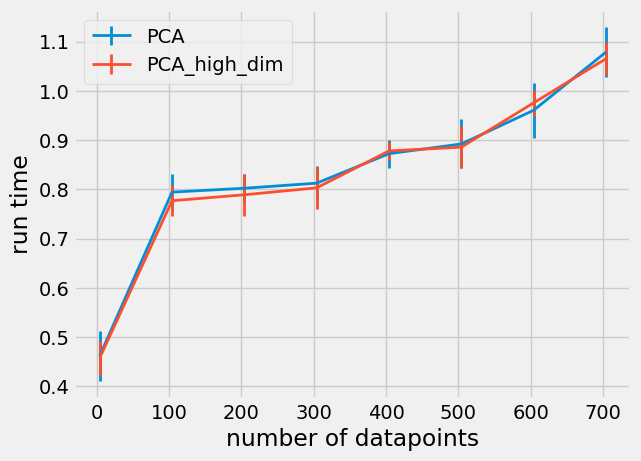

In [56]:
# GRADED FUNCTION: DO NOT EDIT THIS LINE
### PCA for high dimensional datasets

def PCA_high_dim(X, n_components):
    """Compute PCA for small sample size but high-dimensional features.
    Args:
        X: ndarray of size (N, D), where D is the dimension of the sample,
           and N is the number of samples
        num_components: the number of principal components to use.
    Returns:
        X_reconstruct: (N, D) ndarray. the reconstruction
        of X from the first `num_components` pricipal components.
    """
    X, mean, std = normalize(X)
    S = np.cov(X, rowvar=False, bias=True)
    eig_vals, eig_vecs = eig(S)
    P = projection_matrix(eig_vecs[:, :n_components])
    X = (P @ X.T).T
    X_reconstruct = (X @ P.T)

    X_reconstruct = X_reconstruct * std + mean
    
    # Return the reconstructed data
    return X_reconstruct


# Given the same dataset, `PCA_high_dim` and `PCA` should give the same output.
# Assuming we have implemented `PCA`, correctly, we can then use `PCA` to test the correctness
# of `PCA_high_dim`. Given the same dataset, `PCA` and `PCA_high_dim` should give identical results.
#
# We can use this __invariant__
# to test our implementation of PCA_high_dim, assuming that we have correctly implemented `PCA`.

# In[ ]:


np.testing.assert_almost_equal(PCA(Xbar, 2), PCA_high_dim(Xbar, 2))


# Now let's compare the running time between `PCA` and `PCA_high_dim`.
#
# __Tips__ for running benchmarks or computationally expensive code:
#
# When you have some computation that takes up a non-negligible amount of time. Try separating
# the code that produces output from the code that analyzes the result (e.g. plot the results, comput statistics of the results). In this way, you don't have to recompute when you want to produce more analysis.

# The next cell includes a function that records the time taken for executing a function `f` by repeating it for `repeat` number of times. You do not need to modify the function but you can use it to compare the running time for functions which you are interested in knowing the running time.

# In[ ]:


def time(f, repeat=10):
    times = []
    for _ in range(repeat):
        start = timeit.default_timer()
        f()
        stop = timeit.default_timer()
        times.append(stop-start)
    return np.mean(times), np.std(times)


# We first benchmark the time taken to compute $\boldsymbol X^T\boldsymbol X$ and $\boldsymbol X\boldsymbol X^T$. Jupyter's magic command `%time` is quite handy.

# The next cell finds the running time for computing `$X^TX$` and $XX^T$ for different dimensions of X.

# In[ ]:


times_mm0 = []
times_mm1 = []

# iterate over datasets of different size
for datasetsize in np.arange(4, 784, step=20):
    XX = Xbar[:datasetsize] # select the first `datasetsize` samples in the dataset
    # record the running time for computing X.T @ X
    mu, sigma = time(lambda : XX.T @ XX)
    times_mm0.append((datasetsize, mu, sigma))

    # record the running time for computing X @ X.T
    mu, sigma = time(lambda : XX @ XX.T)
    times_mm1.append((datasetsize, mu, sigma))

times_mm0 = np.asarray(times_mm0)
times_mm1 = np.asarray(times_mm1)


# Having recorded the running time for computing `X @ X.T` and `X @ X.T`, we can plot them.

# In[ ]:


fig, ax = plt.subplots()
ax.set(xlabel='size of dataset', ylabel='running time')
bar1 = ax.errorbar(times_mm0[:, 0], times_mm0[:, 1], yerr=times_mm0[:, 2],
                   label="$X^T X$ (PCA)", linewidth=2, color='blue', marker='o', markersize=5)
bar2 = ax.errorbar(times_mm1[:, 0], times_mm1[:, 1], yerr=times_mm1[:, 2],
                   label="$X X^T$ (PCA_high_dim)", linewidth=2, color='orange', marker='s', markersize=5)

ax.legend();


# Alternatively, use the `time` magic command for benchmarking functions.

# In[ ]:


get_ipython().run_line_magic('time', 'Xbar.T @ Xbar')
get_ipython().run_line_magic('time', 'Xbar @ Xbar.T')
pass # Put this here so that our output does not show result of computing `Xbar @ Xbar.T`


# Next we benchmark PCA, PCA_high_dim.

# In[ ]:


times0 = []
times1 = []

# iterate over datasets of different size
for datasetsize in np.arange(4, 784, step=100):
    XX = Xbar[:datasetsize]
    npc = 2
    mu, sigma = time(lambda : PCA(XX, npc), repeat=10)
    times0.append((datasetsize, mu, sigma))

    mu, sigma = time(lambda : PCA_high_dim(XX, npc), repeat=10)
    times1.append((datasetsize, mu, sigma))

times0 = np.asarray(times0)
times1 = np.asarray(times1)


# Let's plot the running time. Spend some time and think about what this plot means. We mentioned in lectures that PCA_high_dim are advantageous when
# we have dataset size $N$ < data dimension $M$. Although our plot does not for the two running time does not intersect exactly at $N = M$, it does show the trend.

# In[ ]:


fig, ax = plt.subplots()
ax.set(xlabel='number of datapoints', ylabel='run time')
ax.errorbar(times0[:, 0], times0[:, 1], times0[:, 2], label="PCA", linewidth=2)
ax.errorbar(times1[:, 0], times1[:, 1], times1[:, 2], label="PCA_high_dim", linewidth=2)
ax.legend();


# Again, with the magic command `time`.

# In[ ]:


get_ipython().run_line_magic('time', 'PCA(Xbar, 2)')
get_ipython().run_line_magic('time', 'PCA_high_dim(Xbar, 2)')
pass


